Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Load dataset

In [2]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

Dataset exploration

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Data Info

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking for null values

In [5]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Drop unneccesary columns

In [6]:
df = df.drop(columns=["customerID"])

Checking for unique values

In [7]:
for col in df.columns:
    print(f"Unique values for {col}:")
    print(df[col].unique())
    print("-" * 40)

Unique values for gender:
['Female' 'Male']
----------------------------------------
Unique values for SeniorCitizen:
[0 1]
----------------------------------------
Unique values for Partner:
['Yes' 'No']
----------------------------------------
Unique values for Dependents:
['No' 'Yes']
----------------------------------------
Unique values for tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------------
Unique values for PhoneService:
['No' 'Yes']
----------------------------------------
Unique values for MultipleLines:
['No phone service' 'No' 'Yes']
----------------------------------------
Unique values for InternetService:
['DSL' 'Fiber optic' 'No']
----------------------------------------
Unique values for OnlineSecurity:
['No' 'Yes' 'No internet service']
---------------

Replace 'No internet service' with 'No'

In [8]:
# List of columns that may contain "No internet service"
internet_related_cols = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Replace "No internet service" with "No"
for col in internet_related_cols:
    df[col] = df[col].replace({'No internet service': 'No'})

# Encode Yes/No into 1/0
for col in internet_related_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


Replace 'No Phone service' with 'No'

In [9]:
# Clean "No phone service" and convert to binary 0/1
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})

Change 'TotalCharges' colum data type to Integer

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

Applying Label-Encoding

In [11]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']

df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0,
                                           'Female': 0, 'Male': 1})

/tmp/ipython-input-85193518.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0,


Applying one-hot encoding to the categorical columns

In [12]:
multi_cols = ['InternetService', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=multi_cols, drop_first=False)


Change Boolian type column to integer

In [13]:
df = df.astype({col: 'int64' for col in df.select_dtypes('bool').columns})

Checking for unique values

In [14]:
# Loop through each column and print its unique values
for col in df.columns:
    print(f"Unique values for {col}:")
    print(df[col].unique())
    print("-" * 40)

Unique values for gender:
[0 1]
----------------------------------------
Unique values for SeniorCitizen:
[0 1]
----------------------------------------
Unique values for Partner:
[1 0]
----------------------------------------
Unique values for Dependents:
[0 1]
----------------------------------------
Unique values for tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------------
Unique values for PhoneService:
[0 1]
----------------------------------------
Unique values for MultipleLines:
[0 1]
----------------------------------------
Unique values for OnlineSecurity:
[0 1]
----------------------------------------
Unique values for OnlineBackup:
[1 0]
----------------------------------------
Unique values for DeviceProtection:
[0 1]
----------------------------------------
Uni

In [15]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,0,0,0,0,8,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6,1,0,0,1,22,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
7,0,0,0,0,10,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
8,0,0,1,0,28,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
9,1,0,0,1,62,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0


In [16]:
print(df.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

Checking for Outliers

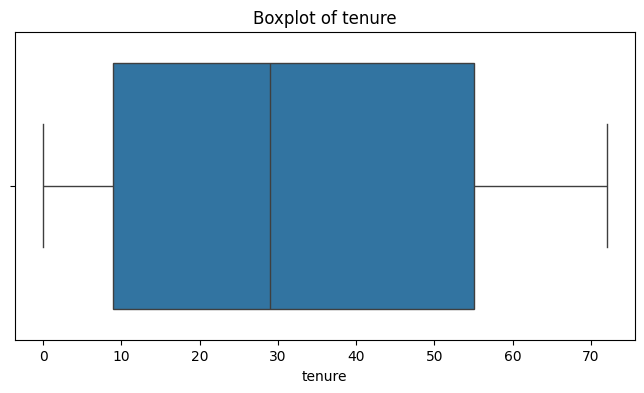

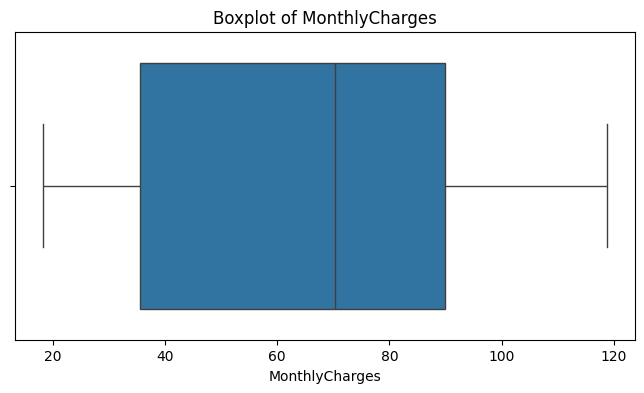

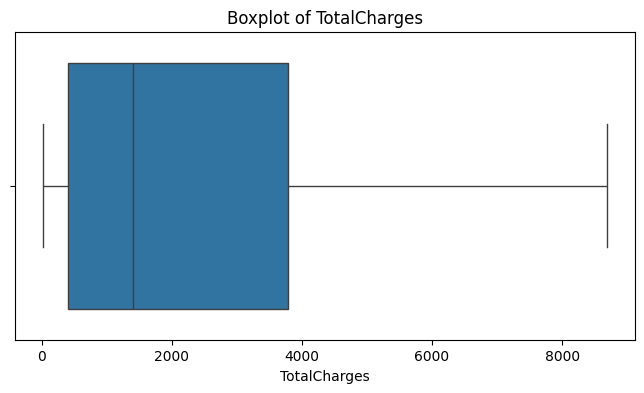

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots for numeric columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Checking for Co-relations

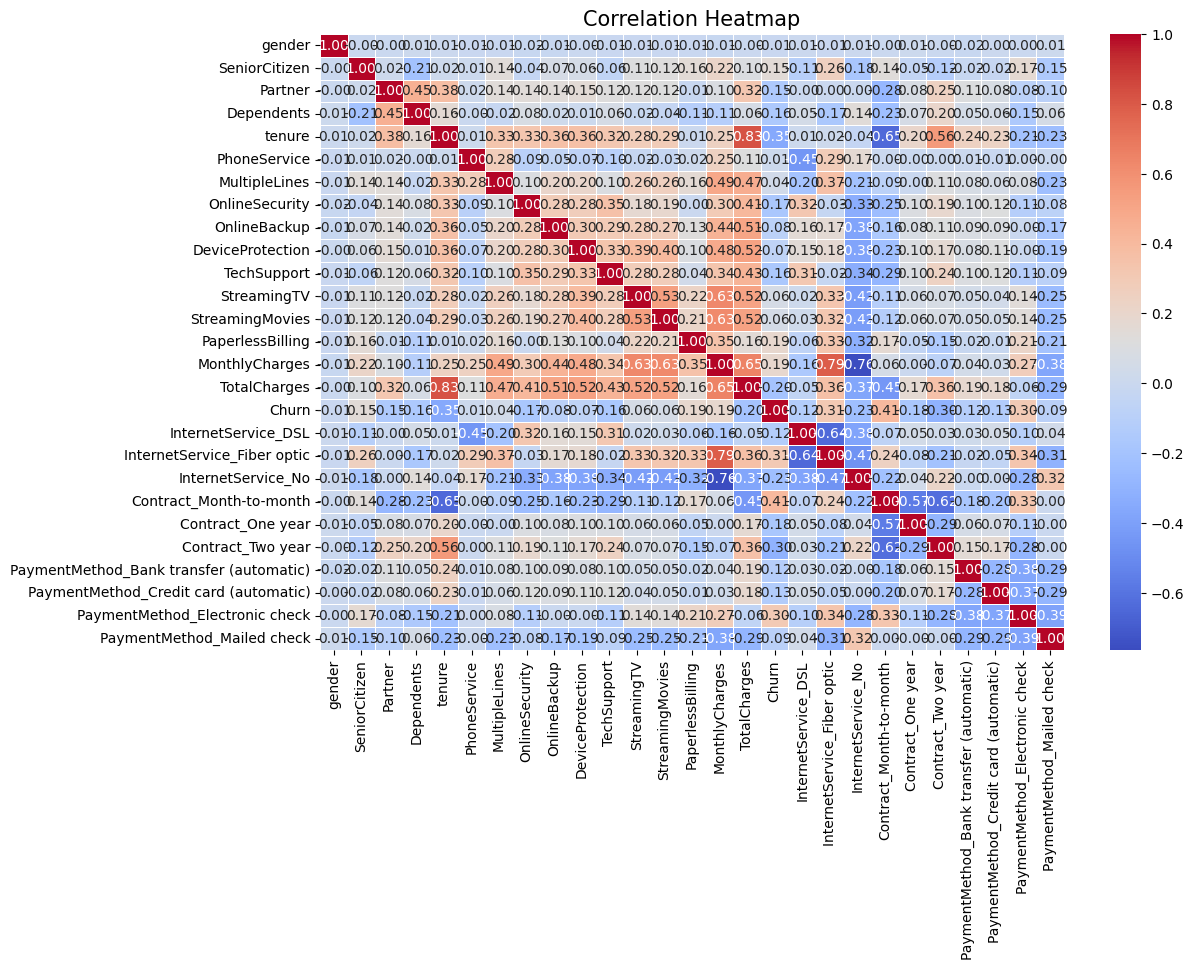

In [19]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap", fontsize=15)

# Show the plot
plt.show()


In [20]:
# Recalculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlation with 'Survival_Months'
correlation_with_survival_months = correlation_matrix['Churn']

# Print the updated correlations
print(correlation_with_survival_months)


gender                                    -0.008612
SeniorCitizen                              0.150889
Partner                                   -0.150448
Dependents                                -0.164221
tenure                                    -0.352229
PhoneService                               0.011942
MultipleLines                              0.040102
OnlineSecurity                            -0.171226
OnlineBackup                              -0.082255
DeviceProtection                          -0.066160
TechSupport                               -0.164674
StreamingTV                                0.063228
StreamingMovies                            0.061382
PaperlessBilling                           0.191825
MonthlyCharges                             0.193356
TotalCharges                              -0.199037
Churn                                      1.000000
InternetService_DSL                       -0.124214
InternetService_Fiber optic                0.308020
InternetServ

In [18]:
# Save the new DataFrame to a CSV file
df.to_csv('Preprocessed_classification.csv', index=False)